In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
data = pd.merge(transactions, customers, on='CustomerID', how='inner')

In [4]:
customer_data = data.groupby('CustomerID').agg(
    total_spending=('TotalValue', 'sum'),
    avg_transaction_value=('Price', 'mean'),
    num_transactions=('TransactionID', 'count'),
    region=('Region', 'first')
).reset_index()

In [5]:
customer_data = pd.get_dummies(customer_data, columns=['region'], drop_first=True)


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data.drop(columns=['CustomerID']))


In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [8]:
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])

In [9]:
print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

DB Index: 1.290983529547829
Silhouette Score: 0.3168976025233732


In [10]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

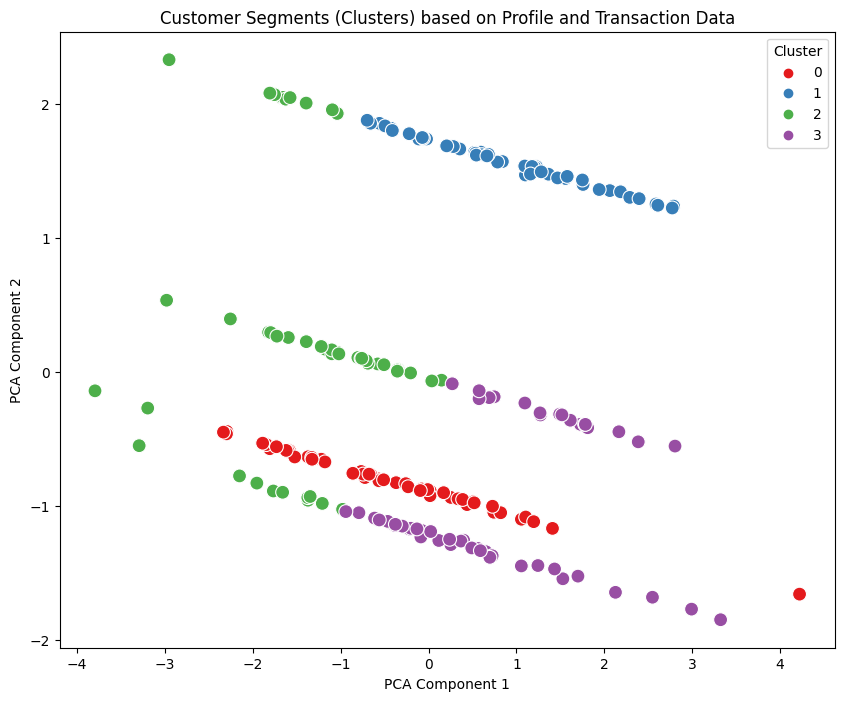

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments (Clusters) based on Profile and Transaction Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()